In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import math
from scipy.misc import imsave
from scipy.misc import imread

df = pd.read_csv("PointPair_Frame.csv")
df.head()

,Unnamed: 0,PID_R,PID_L,Mass_R,X_R,Y_R,Mass_L,X_L,Y_L
0,0,1,1,143.753325,210.071705,60.023256,124.834017,255.875587,67.098592
1,1,3,2,104.471893,201.050667,63.978667,137.727671,239.931915,69.931915
2,2,5,3,95.556958,196.099125,66.002915,134.504257,247.069717,72.917211
3,3,7,4,85.806248,188.964286,68.785714,54.798031,237.064171,74.133690
4,4,8,6,159.633053,196.090750,71.078534,192.525702,244.981735,76.961948


In [3]:
df

,Unnamed: 0,PID_R,PID_L,Mass_R,X_R,Y_R,Mass_L,X_L,Y_L
0,0,1,1,143.753325,210.071705,60.023256,124.834017,255.875587,67.098592
1,1,3,2,104.471893,201.050667,63.978667,137.727671,239.931915,69.931915
2,2,5,3,95.556958,196.099125,66.002915,134.504257,247.069717,72.917211
3,3,7,4,85.806248,188.964286,68.785714,54.798031,237.064171,74.133690
4,4,8,6,159.633053,196.090750,71.078534,192.525702,244.981735,76.961948
5,5,9,8,187.770816,188.872404,79.115727,120.438453,242.919708,84.131387
6,6,11,9,88.034982,184.958861,84.803797,202.195943,242.930435,88.972464
7,7,13,10,203.371952,175.131507,89.136986,76.482813,239.203065,92.977011
8,8,14,12,72.155254,164.729730,89.776062,96.116332,251.118902,94.143293
9,9,15,13,212.008295,168.952694,91.039422,109.889099,244.941333,95.866667


In [2]:
A = []
one = [1,1,1,1,1,1,1,1,1]
zero = [0,0,0,0,0,0,0,0,0]
for ip in range(len(df)):
    plx = df['X_L'].iloc[ip]
    ply = df['Y_L'].iloc[ip]
    prx = df['X_R'].iloc[ip]
    pry = df['Y_R'].iloc[ip]
    xlxr = plx*prx
    xlyr = plx*pry
    xl = plx
    ylxr = ply*prx
    ylyr = ply*pry
    yl = ply
    xr = prx
    yr = pry
    null = 1
    Ai = [xlxr,xlyr,xl,ylxr,ylyr,yl,xr,yr,1]
    A.append(Ai) 
Aarray = np.matrix(A)
AarrayT = Aarray.transpose()
AA = Aarray.transpose()*Aarray
AA

matrix([[  3.32543418e+12,   1.88697502e+12,   1.63822552e+10,
           1.33881698e+12,   8.35253045e+11,   6.54514625e+09,
           1.13741271e+10,   6.31558469e+09,   5.72080301e+07],
        [  1.88697502e+12,   1.31664923e+12,   1.01284348e+10,
           8.35253045e+11,   6.22379537e+11,   4.52243073e+09,
           6.31558469e+09,   4.42331847e+09,   3.49229213e+07],
        [  1.63822552e+10,   1.01284348e+10,   8.96167489e+07,
           6.54514625e+09,   4.52243073e+09,   3.60714377e+07,
           5.72080301e+07,   3.49229213e+07,   3.20875138e+05],
        [  1.33881698e+12,   8.35253045e+11,   6.54514625e+09,
           6.00373565e+11,   3.97477110e+11,   2.93596869e+09,
           4.62976047e+09,   2.86039896e+09,   2.31663502e+07],
        [  8.35253045e+11,   6.22379537e+11,   4.52243073e+09,
           3.97477110e+11,   3.13871193e+11,   2.19195869e+09,
           2.86039896e+09,   2.15557624e+09,   1.60735681e+07],
        [  6.54514625e+09,   4.52243073e+09,   3.6

In [3]:
w, v = LA.eig(AA)
v1 = v.transpose()
print(w)
print(v1)
imin = np.argmin(w)
print(imin)
en = w[imin]
ev = v1[imin]
ev

[  5.27054830e+12   2.45263280e+11   3.50906210e+10   5.58249563e+09
   6.03589349e+06   2.34800073e+05   1.58376154e+05   6.12797585e+02
   2.30031655e-01]
[[ -7.84350414e-01  -4.78257917e-01  -3.95330813e-03  -3.29004686e-01
   -2.18612883e-01  -1.65864565e-03  -2.67348337e-03  -1.60926135e-03
   -1.37957737e-05]
 [ -5.78336156e-01   6.49082512e-01   1.28894481e-04   1.16035291e-01
    4.80352997e-01   2.21701259e-03  -2.31383890e-03   2.38901827e-03
   -3.41006558e-08]
 [  1.48301096e-01   4.44434486e-01   1.00081389e-02  -8.56819308e-01
   -2.15032276e-01  -1.72841202e-04  -2.50291908e-03  -3.30415190e-04
    2.00016106e-05]
 [  1.68162940e-01  -3.90389864e-01   6.05235603e-03  -3.79553165e-01
    8.21666107e-01   4.00492528e-03   7.35256995e-03   3.80095350e-03
    7.26329560e-05]
 [  6.66822374e-03   1.35582764e-03  -7.56254011e-01  -7.52386581e-03
    8.68186794e-03  -3.06213880e-01  -4.98656001e-01  -2.92316427e-01
   -5.28613251e-03]
 [ -1.91436121e-03   4.46735497e-03  -1.641

matrix([[  1.75345969e-07,   1.92508173e-05,  -3.15390413e-03,
           1.87353876e-05,   9.79548859e-07,   5.12220927e-02,
          -3.69560210e-03,  -5.72239187e-02,   9.97034661e-01]])

In [4]:
AA*ev.transpose()

matrix([[ -5.96046448e-08],
        [  4.35113907e-06],
        [ -7.25493301e-04],
        [  4.32133675e-06],
        [  2.08616257e-07],
        [  1.17827025e-02],
        [ -8.50105658e-04],
        [ -1.31633129e-02],
        [  2.29349534e-01]])

In [5]:
ev1 = np.array(ev)
ev1 = ev1[0]
F = [[ev1[0],ev1[3],ev1[6]],[ev1[1],ev1[4],ev1[7]],[ev1[2],ev1[5],ev1[8]]]
MatrixL = np.array(F)
MatrixR = MatrixL.transpose()
MatrixL

array([[  1.75345969e-07,   1.87353876e-05,  -3.69560210e-03],
       [  1.92508173e-05,   9.79548859e-07,  -5.72239187e-02],
       [ -3.15390413e-03,   5.12220927e-02,   9.97034661e-01]])

(0, 0.19964687183137572, 0.2109653829716)
(1, 0.1810651312366001, 0.18965582112778775)
(2, 0.8393841518896124, 0.8801286331728099)
(3, 0.024382338109099854, 0.02541200443724257)
(4, 0.1129766594440525, 0.11838970709649346)
(5, 0.050766852297082256, 0.05304409729560092)
(6, 0.5101395045489683, 0.5324207788676466)
(7, 0.217859390951783, 0.2263392706998629)
(8, 0.3899081942170192, 0.40542599583773786)
(9, 0.9089363809402599, 0.9444007504086243)
(10, 0.066049767234983, 0.06953809885723015)
(11, 0.44900512701230205, 0.4648362407037951)
(12, 0.21776566254962174, 0.22794792786687026)
(13, 0.11451221385218883, 0.11966628192411434)
(14, 0.3651305925277597, 0.37841470872918476)
(15, 0.004057469406834065, 0.004310970479912044)
(16, 0.12905589319374453, 0.13731483606521733)
(17, 0.1446995384991685, 0.14951380514170728)
(18, 0.23786351353106633, 0.24577408273389786)
(19, 0.14157072963136794, 0.1477347691087336)
(20, 0.3297884228452921, 0.3521135554487557)
(21, 0.009560046375099187, 0.01020497112429

(178, 0.15298929026963423, 0.1606099126568468)
(179, 0.10138066925006242, 0.1041966472880466)
(180, 0.2747412671529151, 0.29328915536813055)
(181, 0.32031523312300997, 0.3306159874495315)
(182, 0.09743068652081957, 0.1001711325201078)
(183, 0.11375317262572118, 0.11428751360988097)
(184, 0.12226188488548766, 0.12384362060632904)
(185, 0.10329166827836579, 0.10619290713315219)
(186, 0.30560161204054037, 0.3266173533020537)
(187, 0.07964878774514866, 0.08490465060384575)
(188, 0.16440420609439074, 0.1696431473814146)
(189, 0.317098645477592, 0.3259151528827651)
(190, 0.0944164007998911, 0.1005943399418003)
(191, 0.06460249064219531, 0.06616646539553725)
(192, 0.05714152324894113, 0.05977970310860394)
(193, 0.002017284135498456, 0.002041670405784614)
(194, 0.2302019081880449, 0.24978127980918666)
(195, 0.05945262809167104, 0.05996739239183425)
(196, 0.07876451215174242, 0.08009445916978229)
(197, 0.061824355491162976, 0.0637822911476676)
(198, 0.06922774768799445, 0.07574347978048959)
(19

(353, 0.13689119643242956, 0.13581198401490677)
(354, 0.1902791484354976, 0.20462162096327285)
(355, 0.02141843241562561, 0.020900752385128615)
(356, 0.19655687263064592, 0.1902523508172808)
(357, 0.07391213968535423, 0.0737365405869719)
(358, 0.11519250009648793, 0.11389868663417102)
(359, 0.07312389717428139, 0.07277623009318337)
(360, 0.06830671746167293, 0.0651917120812099)
(361, 0.07243766249984042, 0.0762728271732582)
(362, 0.18828197203667205, 0.17823355057649096)
(363, 0.12964528622512667, 0.13460646036756532)
(364, 0.1390178977993924, 0.14628886047309952)
(365, 0.03570222945656961, 0.03718904060393443)
(366, 0.7283545914117739, 0.7538650597782692)
(367, 0.24405621552928958, 0.2702840224531974)
(368, 0.8302453225395439, 0.870336056813722)
(369, 0.4928148109766265, 0.5390300546246902)
(370, 0.0921184992289303, 0.0960105237065679)
(371, 0.3094728708796202, 0.3475810980331585)
(372, 0.04974565576037871, 0.05150493453756239)
(373, 0.15841256440663123, 0.17637443520557508)
(374, 0.2

(533, 0.18645892623186142, 0.20710308424567692)
(534, 0.20117689406156733, 0.20294095015592994)
(535, 0.029154852351444854, 0.03269745479886402)
(536, 0.006833573361303855, 0.007351273673270582)
(537, 0.08377366624639468, 0.09224485015796158)
(538, 0.16607802147506548, 0.16967512017459313)
(539, 0.0590149948373634, 0.06570387268362678)
(540, 0.3493333156051256, 0.36579402955296925)
(541, 0.305942546265854, 0.33927963087095964)
(542, 0.10027170132619198, 0.11316573650621208)
(543, 0.053054039283413984, 0.05771322590939509)
(544, 0.050032351975541886, 0.05515420027237054)
(545, 0.14277185510050183, 0.1545533416744955)
(546, 0.10492807400711718, 0.11783876878535045)
(547, 0.17528552354241544, 0.19543940246513367)
(548, 0.3173207732717319, 0.34293422301026644)
(549, 0.06686677895903417, 0.07241834643551605)
(550, 0.37840131018976453, 0.38804384333141556)
(551, 0.3541306794452731, 0.3796532680621624)
(552, 0.07187839831341593, 0.08030589455374103)
(553, 0.11600830718061239, 0.11779601809995

(705, 0.05450128736231117, 0.057117883394609444)
(706, 0.010492755194480445, 0.011090196246916963)
(707, 0.5221115152513867, 0.5520828677155265)
(708, 0.06627441627390775, 0.06818317612808102)
(709, 0.010111960093948137, 0.010405816127698982)
(710, 0.0765146822698058, 0.08230553941212823)
(711, 0.09526581426841535, 0.09983611586889249)
(712, 0.07920377857014263, 0.08370214399359704)
(713, 0.22436391232913228, 0.23410097269109512)
(714, 0.06701822510265831, 0.06950615023059144)
(715, 0.02842203746542443, 0.030103414898060385)
(716, 0.014665061044838987, 0.014584343497602941)
(717, 0.5532398858803841, 0.5915971577253625)
(718, 0.13168621441628686, 0.14157573978138477)
(719, 0.07624402574621914, 0.08476919176919694)
(720, 0.02600050495571502, 0.026792239004315495)
(721, 0.4358935051485065, 0.47053635208212113)
(722, 0.022680567272458586, 0.023056234220204398)
(723, 0.1951746300184067, 0.1952406828046597)
(724, 0.3096957439886628, 0.3340021881332941)
(725, 0.031526438525962305, 0.034522117

(882, 0.11843911818278703, 0.12113650622383168)
(883, 0.22559193379236722, 0.22378050157329404)
(884, 0.018728678991937107, 0.0193280785482409)
(885, 0.31683629952490955, 0.35367030014621254)
(886, 0.21778911523204905, 0.21526840485439713)
(887, 0.047742845179212956, 0.048996117293948)
(888, 0.18213002111777213, 0.1829208694129346)
(889, 0.09569267404332955, 0.09801440742703157)
(890, 0.12944875679431664, 0.13559666761761044)
(891, 0.081415519227873, 0.08980667746992196)
(892, 0.08171936311254664, 0.08313205212597366)
(893, 0.07749097241531235, 0.08139417597220679)
(894, 0.13847405557908687, 0.15209140539947352)
(895, 0.12304397068111585, 0.13741378089938808)
(896, 0.10262445591845663, 0.10870562990141953)
(897, 0.3784527935860956, 0.4020732728108721)
(898, 0.1122555139822292, 0.10989754762529033)
(899, 0.21226309473767044, 0.20420116606139999)
(900, 0.15016501048591252, 0.15057510061093926)
(901, 0.03268754248510917, 0.03274817771212185)
(902, 0.009220680264798789, 0.00914083541023696

(1056, 0.2656988332849939, 0.2763245967899235)
(1057, 0.022518347296816336, 0.02533592466821983)
(1058, 0.23080480793664682, 0.22446064928418244)
(1059, 0.30719544151081657, 0.33643838932083225)
(1060, 0.3524221091726185, 0.3795696038001488)
(1061, 0.25101350631629377, 0.26311366286719096)
(1062, 0.3223739744689632, 0.3306650205672163)
(1063, 0.08992466463713789, 0.10019232867292285)
(1064, 0.18196296489937758, 0.1926791273810618)
(1065, 0.18715060629246932, 0.20791615134800137)
(1066, 0.2165837161605804, 0.24143188087796327)
(1067, 0.14424975197458315, 0.14924518941566323)
(1068, 0.10609480987783373, 0.11609805757176361)
(1069, 0.4363670078034321, 0.47962156728641325)
(1070, 0.4975059332360144, 0.5555103906383941)
(1071, 0.391336629575297, 0.44044697703220115)
(1072, 0.34521200673869845, 0.3652154662263254)
(1073, 0.6456150237500007, 0.7077653340867031)
(1074, 0.9123616965286339, 0.9507648416407685)
(1075, 0.1334269634581737, 0.14887641062833656)
(1076, 0.14443274367449666, 0.16169861

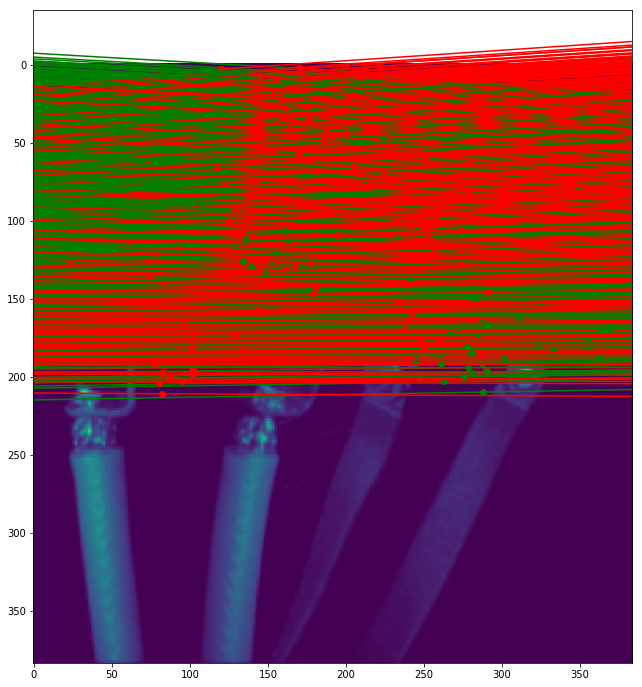

In [6]:
imgL = imread('v0.png')
imgR = imread('u0.png')
plt.figure(figsize=(12,12))
plt.imshow(imgL+imgR)
x = np.arange(0,384,1)
for ip in range(0,len(df)):
    plx = df['X_L'].iloc[ip]
    ply = df['Y_L'].iloc[ip]
    prx = df['X_R'].iloc[ip]
    pry = df['Y_R'].iloc[ip]
    ipL = [plx,ply,1]
    ipR = [prx,pry,1]
    LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixR) #points in the left frame and the corresponding epipolar lines in the right frame
    yL = (-LineL[2]-LineL[0]*x)/LineL[1]
    yR = (-LineR[2]-LineR[0]*x)/LineR[1]
    dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])  
    plt.plot(x,yL,color='g')
    plt.plot(x,yR,color='r')
    plt.plot(prx,pry,"o",color='r')    
    plt.plot(plx,ply,"o",color='g')  
    print(ip,dlr,drl)
plt.show()